# Sentiment Analysis on Movie Reviews - Baseline Model

## Introduction
This notebook serves as a baseline model for the **Sentiment Analysis on Movie Reviews** competition. The goal is to classify movie reviews as different sentiment classes.

In this notebook, we will:
1. **Load and explore the dataset**
2. **Preprocess the text (cleaning, tokenization, TF-IDF)**
3. **Train a baseline model (Linear Regression, Logistic Regression, and NN)**
4. **Evaluate its performance**


### Import Libraries

In [1]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import string

### Step 1: Data Ingestion

In [ ]:
df = pd.read_csv("train.tsv", sep="\t")
df.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,"A series of escapades demonstrating the adage that what is good for the goose is also good for the gander , some of which occasionally amuses but none of which amounts to much of a story .",1
1,2,1,A series of escapades demonstrating the adage that what is good for the goose,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2


In [75]:
df = df[['PhraseId', 'Phrase','Sentiment']]
df.shape

(156060, 3)

In [76]:
unique_sentiment_percent = df["Sentiment"].value_counts().reset_index().sort_values(by='Sentiment')
unique_sentiment_percent.columns = ['Sentiment', 'count']
unique_sentiment_percent['proportion'] = unique_sentiment_percent['count'] / df.shape[0] * 100
unique_sentiment_percent['proportion'] = unique_sentiment_percent['proportion'].apply(lambda x: f"{x:.2f}%")
unique_sentiment_percent

,Sentiment,count,proportion
4,0,7072,4.53%
2,1,27273,17.48%
0,2,79582,50.99%
1,3,32927,21.10%
3,4,9206,5.90%


<ipython-input-83-5372d34a7d6c>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Sentiment"], palette="viridis")


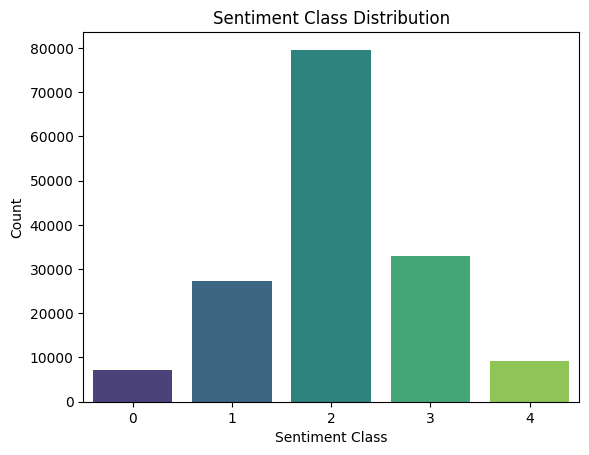

In [83]:
sns.countplot(x=df["Sentiment"], palette="viridis")
plt.title("Sentiment Class Distribution")
plt.xlabel("Sentiment Class")
plt.ylabel("Count")
plt.show()


count    156060.000000
mean          7.203364
std           7.024604
min           0.000000
25%           2.000000
50%           5.000000
75%          10.000000
max          52.000000
Name: Phrase_length, dtype: float64


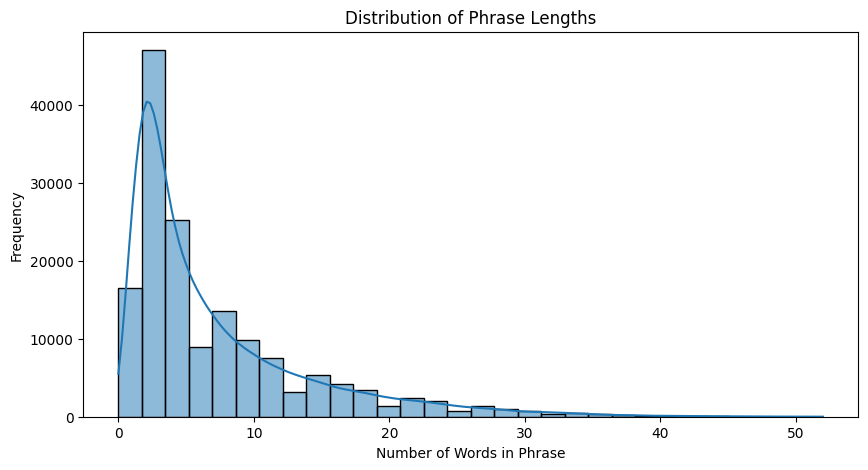

In [84]:
df["Phrase_length"] = df["Phrase"].apply(lambda x: len(x.split()))
print(df["Phrase_length"].describe())

plt.figure(figsize=(10,5))
sns.histplot(df["Phrase_length"], bins=30, kde=True)
plt.title("Distribution of Phrase Lengths")
plt.xlabel("Number of Words in Phrase")
plt.ylabel("Frequency")
plt.show()


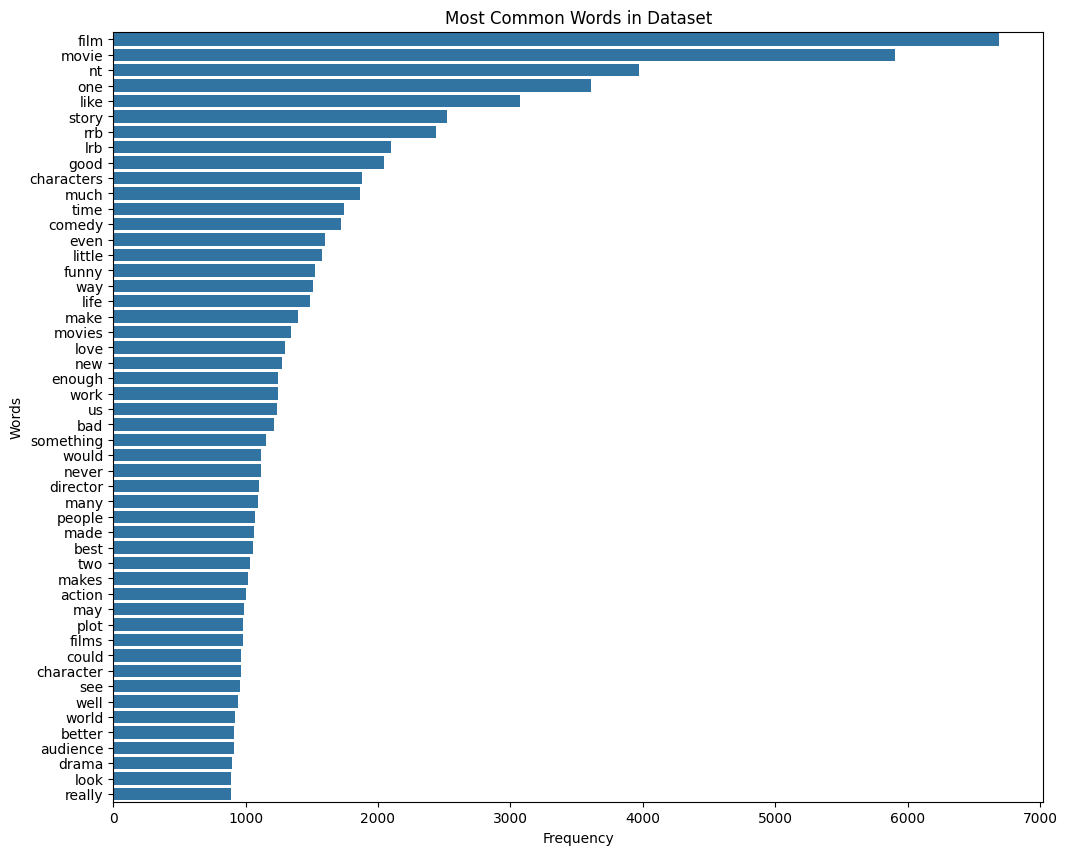

In [97]:
word_counts = Counter(" ".join(df["Phrase"]).split())
common_words = word_counts.most_common(50)
plt.figure(figsize=(12,10))
sns.barplot(x=[word[1] for word in common_words], y=[word[0] for word in common_words])
plt.title("Most Common Words in Dataset")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


---
### Step 2: Data preprocessing

In [92]:
# Shuffle the dataset
df = df.sample(frac=1, random_state=1234).reset_index(drop=True)
# Lowercasing
df["Phrase"] = df["Phrase"].str.lower()
# Remove Punctuation
df["Phrase"] = df["Phrase"].str.translate(str.maketrans("", "", string.punctuation))
# Remove Stopwords
stop_words = set(stopwords.words("english"))
df["Phrase"] = df["Phrase"].apply(lambda text: " ".join([word for word in text.split() if word not in stop_words]))
# Lemmatization
lemmatizer = WordNetLemmatizer()
df["Phrase"] = df["Phrase"].apply(lambda text: " ".join([lemmatizer.lemmatize(word, pos="v") for word in text.split()]))

#### TF-IDF

In [72]:
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X = vectorizer.fit_transform(df["Phrase"])
y = df["Sentiment"]
print(f"TF-IDF feature matrix shape: {X.shape}")

TF-IDF feature matrix shape: (156060, 5000)


In [60]:
feature_names = vectorizer.get_feature_names_out()
first_text_vector = X[0].toarray().flatten()
# see TF-IDF words
top_n = 10
top_indices = np.argsort(first_text_vector)[::-1][:top_n]
top_words = [feature_names[i] for i in top_indices]
top_scores = [first_text_vector[i] for i in top_indices]
print("Top TF-IDF words in first text:")
for word, score in zip(top_words, top_scores):
    print(f"{word}: {score:.4f}")

Top TF-IDF words in first text:
good: 0.5017
goose: 0.4397
demonstrate: 0.3892
occasionally: 0.3619
series: 0.3303
amuse: 0.3252
story: 0.2400
fessenden: 0.0000
fence: 0.0000
feral: 0.0000


#### Train and Test Split

In [67]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=1234)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1234)

print(f"Train set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")

Train set: (93636, 5000), Validation set: (31212, 5000), Test set: (31212, 5000)


---
### Step 3: Exploratory data analysis (EDA)

---
### Step 4: BaseLine Models

---
### Step 5: Evaluation